In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [10]:
num_words = 10000  
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)

In [11]:
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])


In [13]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=256)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=256)

In [14]:
model = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=16, input_length=256),
    layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


C:\Users\ASUS\anaconda3\envs\practical\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 509ms/step - accuracy: 0.5590 - loss: 0.6873 - val_accuracy: 0.7468 - val_loss: 0.5645
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 463ms/step - accuracy: 0.7708 - loss: 0.5376 - val_accuracy: 0.8152 - val_loss: 0.4208
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 640ms/step - accuracy: 0.8374 - loss: 0.3848 - val_accuracy: 0.8442 - val_loss: 0.3631
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 859ms/step - accuracy: 0.8695 - loss: 0.3220 - val_accuracy: 0.8522 - val_loss: 0.3445
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 587ms/step - accuracy: 0.8850 - loss: 0.2939 - val_accuracy: 0.8492 - val_loss: 0.3634
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 703ms/step - accuracy: 0.8891 - loss: 0.2859 - val_accuracy: 0.8358 - val_loss: 0.3760
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 655ms/step - accuracy: 0.9042 - loss: 0.2514 - val_accuracy: 0.8256 - val_loss: 0.3952
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 563ms/step - accuracy: 0.9122 - loss: 0.2359 - val_accu

In [17]:
results = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {results[1]*100:.2f}%")

782/782 - 16s - 20ms/step - accuracy: 0.8349 - loss: 0.4004

Test Accuracy: 83.49%


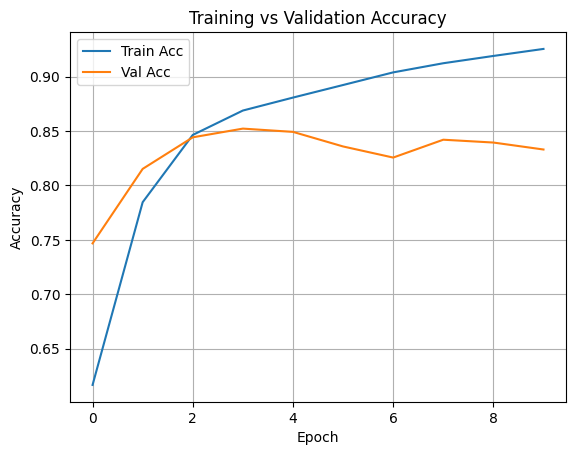

In [18]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.title("Training vs Validation Accuracy")
    plt.show()

plot_history(history)
